# Retail Sector Project 



# Problem Statement

- A retail chain wants to forecast weekly sales for each store and department to optimize inventory, staffing, and promotional strategies. Accurate forecasts help reduce overstock/understock situations, improve revenue, and enhance customer satisfaction.


# Data Dictionary

- Store 🏬 – Store ID (which store). Used to compare sales between stores.

- Dept 🛒 – Department ID (e.g., Grocery, Electronics). Used for department-level analysis.

- Date 📅 – Week-ending date. Used for trend & seasonality forecasting.

- Weekly_Sales 💰 – Sales amount for that store & department in a week. (Target variable).

- IsHoliday 🎉 – Holiday week (Yes/No). Helps capture holiday-driven sales spikes.

# Data Preprocessing And Exploration

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import Dataset

df = pd.read_csv(r"C:\Users\akhi1\Downloads\sales data-set.csv")

In [3]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [4]:
df.shape

(421570, 5)

In [5]:
df.size

2107850

In [6]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
df.dtypes #checking the data types

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [8]:
#  Feature Engineering

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)

In [9]:
# Convert categorical

df["Store"] = df["Store"].astype("category")
df["Dept"] = df["Dept"].astype("category")
df["IsHoliday"] = df["IsHoliday"].astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  category      
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  category      
 5   Year          421570 non-null  int32         
 6   Month         421570 non-null  int32         
 7   Week          421570 non-null  int32         
dtypes: category(3), datetime64[ns](1), float64(1), int32(3)
memory usage: 12.5 MB


In [11]:
df.isna().sum() #checking the missing values

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Year            0
Month           0
Week            0
dtype: int64

In [12]:
df.duplicated().sum() #checking the duplicate values

0

In [13]:
df.nunique() # checking the uniques

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Year                 3
Month               12
Week                52
dtype: int64

In [14]:
df.describe() # getting the statistical summary

,Date,Weekly_Sales,Year,Month,Week
count,421570,421570.000000,421570.000000,421570.000000,421570.000000
mean,2011-06-18 08:30:31.963375104,15981.258123,2010.968591,6.449510,25.826762
min,2010-02-05 00:00:00,-4988.940000,2010.000000,1.000000,1.000000
25%,2010-10-08 00:00:00,2079.650000,2010.000000,4.000000,14.000000
50%,2011-06-17 00:00:00,7612.030000,2011.000000,6.000000,26.000000
75%,2012-02-24 00:00:00,20205.852500,2012.000000,9.000000,38.000000
max,2012-10-26 00:00:00,693099.360000,2012.000000,12.000000,52.000000
std,NaN,22711.183519,0.796876,3.243217,14.151887


# Insight:

# Date:

- Covers Feb 2010 – Oct 2012 (~3 years).

- Evenly spread across time.

# Weekly_Sales:

- Avg = 15.9K, Median = 7.6K → right-skewed.

- Range: -4.9K (returns) → 693K (holiday spikes).

- Very high variability (std = 22.7K).

# Year/Month/Week

- Data covers 2010–2012, all 12 months and 52 weeks → complete coverage.

- Seasonality possible (e.g., Nov–Dec peaks).

# Overall Insights:

1 Data Coverage:

- Weekly sales data spans Feb 2010 – Oct 2012 (~3 years).

- Covers all months and weeks → no seasonal gaps.

2 Sales Distribution

- Highly skewed right: Most stores sell below 20K, but a few hit extremely high numbers (>600K).

- Indicates strong outlier influence (holiday sales, promotions).

- Negative sales values suggest returns or correction entries.

3 Trends & Seasonality (implied)

- Likely holiday peaks in Nov–Dec (Thanksgiving, Christmas).

- Summer (June–July) may have mid-year dips/spikes depending on promotions.

4 Variability

- Std dev is larger than mean, meaning very high variance → models must handle outliers carefully.

- Some departments/stores contribute heavily, others very little.

# Exploratory Data Analysis (EDA)

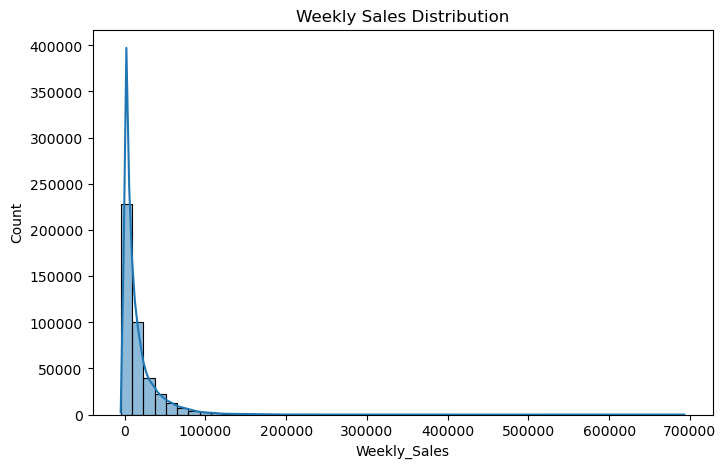

In [15]:
#  Target Variable Distribution

plt.figure(figsize=(8,5))
sns.histplot(df["Weekly_Sales"], bins=50, kde=True)
plt.title("Weekly Sales Distribution")
plt.show()

# Insight:
- The Weekly Sales distribution is highly right-skewed, meaning most stores/departments record low-to-moderate sales while a few generate extremely high revenue.

- These outliers (very high sales) are likely linked to holidays, promotions, or top-performing departments.

- The skewness indicates that revenue is unevenly distributed, so focusing on high-performing periods/departments can maximize business growth.

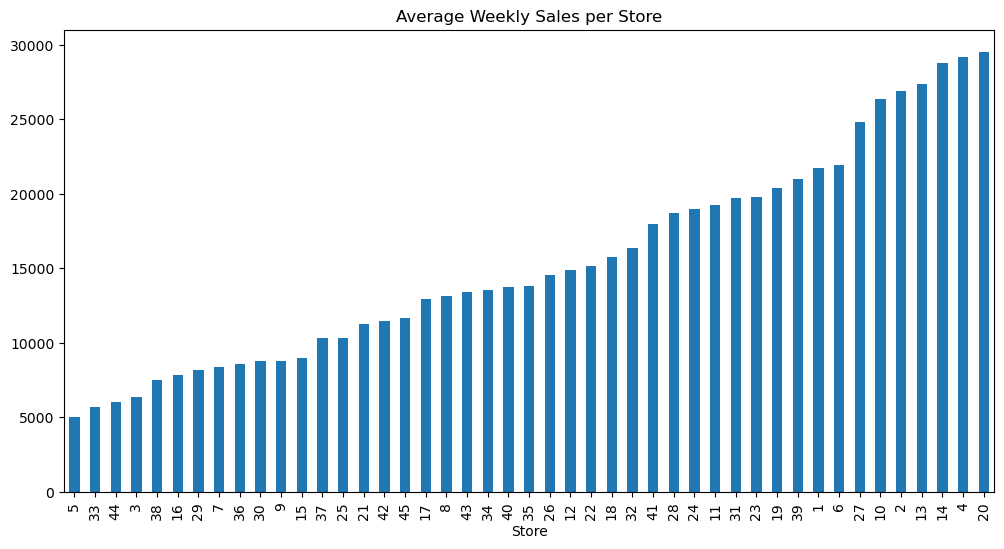

In [16]:
# Store-wise average sales

plt.figure(figsize=(12,6))
store_sales = df.groupby("Store")["Weekly_Sales"].mean().sort_values()
store_sales.plot(kind="bar", figsize=(12,6))
plt.title("Average Weekly Sales per Store")
plt.show()

# Insight:

- Stores show a wide variation in average weekly sales, meaning performance is not uniform across locations.

- A few stores significantly outperform others, suggesting stronger customer demand or better local strategies.

- Lower-performing stores may need targeted interventions like promotions, product mix adjustments, or operational improvements.

- Identifying what drives success in top stores can help replicate those strategies in underperforming ones.

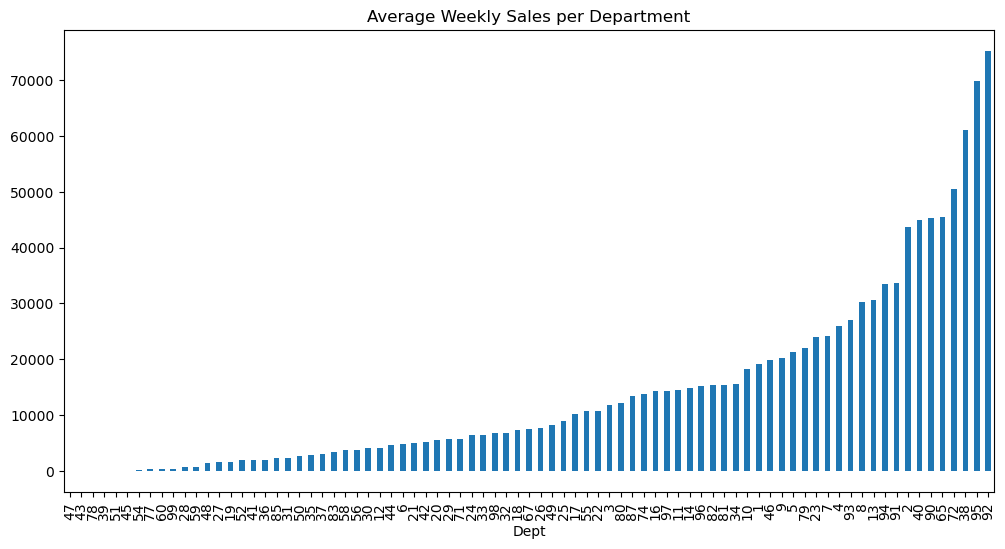

In [17]:
# Dept-wise average sales

plt.figure(figsize=(12,6))
dept_sales = df.groupby("Dept")["Weekly_Sales"].mean().sort_values()
dept_sales.plot(kind="bar", figsize=(12,6))
plt.title("Average Weekly Sales per Department")
plt.show()

# Insight:
- Average sales vary widely across departments, with a few departments consistently generating much higher revenue than others.

- Many departments fall in the low-to-mid sales range, showing that business heavily depends on a handful of high-performing departments.

- To drive overall growth, management should focus on scaling best practices from top-performing departments while boosting weaker ones through promotions, product mix changes, or localized strategies.

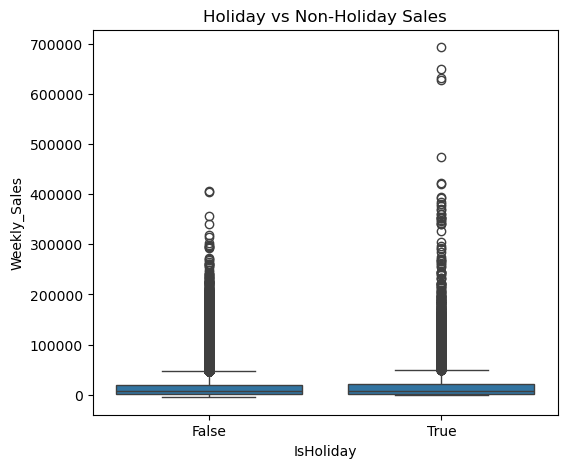

In [18]:
#  Holiday vs Non-Holiday Sales

plt.figure(figsize=(6,5))
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=df)
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

# Insight:

- Weekly sales show higher variability during holiday weeks, with more extreme values (outliers) compared to non-holiday periods.

- Median sales in holiday weeks are generally higher, indicating increased customer spending during holidays.

- Non-holiday sales are more stable, suggesting regular, predictable demand patterns.

- The spikes in holiday sales highlight the importance of holiday promotions, inventory planning, and staffing to capture peak demand

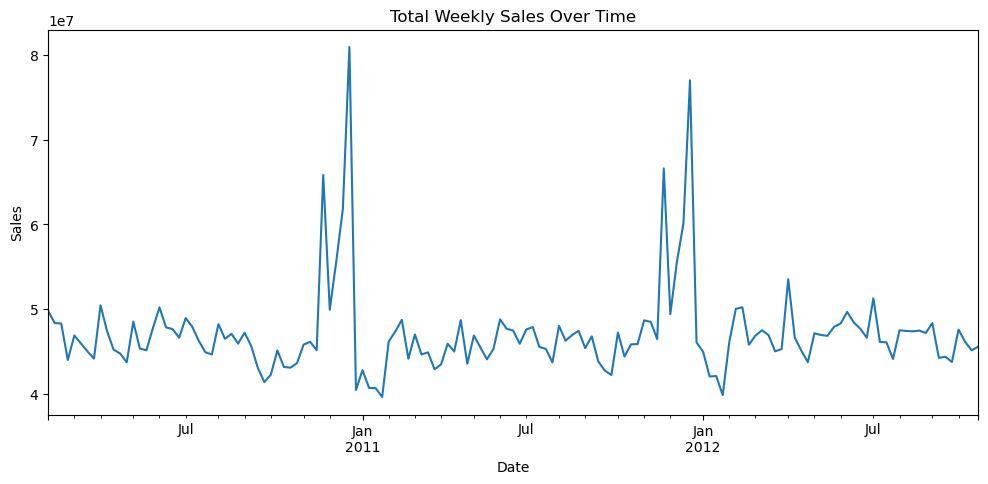

In [19]:
# Sales Trend Over Time

plt.figure(figsize=(12,5))
df.groupby("Date")["Weekly_Sales"].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Insight:

- Weekly sales show a clear seasonal pattern, with noticeable peaks during certain periods, likely linked to holidays or promotional events.

- Sales generally fluctuate over time rather than staying constant, indicating the need for dynamic forecasting models.

- The recurring spikes suggest that holidays drive significant revenue surges, making them critical for business strategy.

- Stable baseline sales between peaks indicate steady demand, while sudden jumps highlight the importance of inventory and staffing adjustments around high-demand weeks.

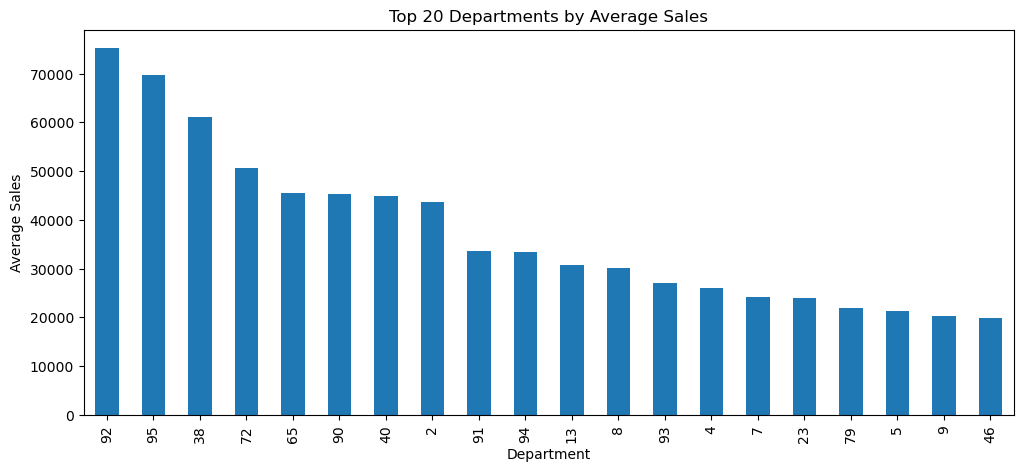

In [20]:
# Dept-wise Average Sales

dept_sales = df.groupby("Dept")["Weekly_Sales"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,5))
dept_sales.plot(kind="bar")
plt.title("Top 20 Departments by Average Sales")
plt.xlabel("Department")
plt.ylabel("Average Sales")
plt.show()

# Insight:

- Based on the data, the top 20 departments have a wide range of average weekly sales.
  
-  Departments 92 and 95 are the clear top performers. The large gap in sales between the leading departments and the rest of the top 20 suggests that   there is a significant opportunity to increase revenue by analyzing and applying the successful strategies of the top performers to other departments.

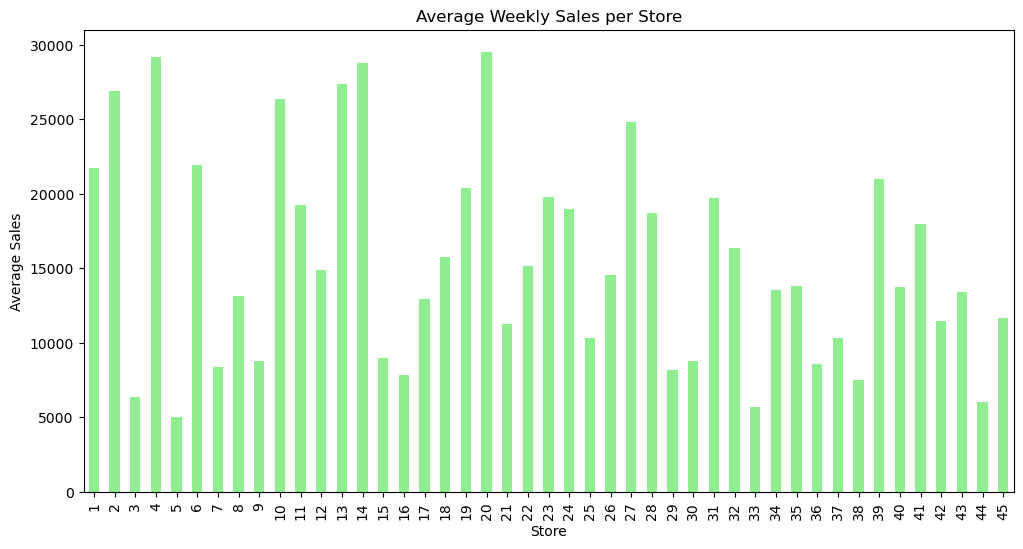

In [21]:
# Store-wise Sales

plt.figure(figsize=(12,6))
df.groupby("Store")["Weekly_Sales"].mean().plot(kind="bar", color="lightgreen")
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.show()

# Insight:

- The average weekly sales vary widely across different stores, indicating a significant difference in performance. Stores 20, 4, and 14 are the top performers, while some stores have significantly lower sales.
  
- The company should investigate the success factors of the high-performing stores to replicate them in others and improve overall sales.

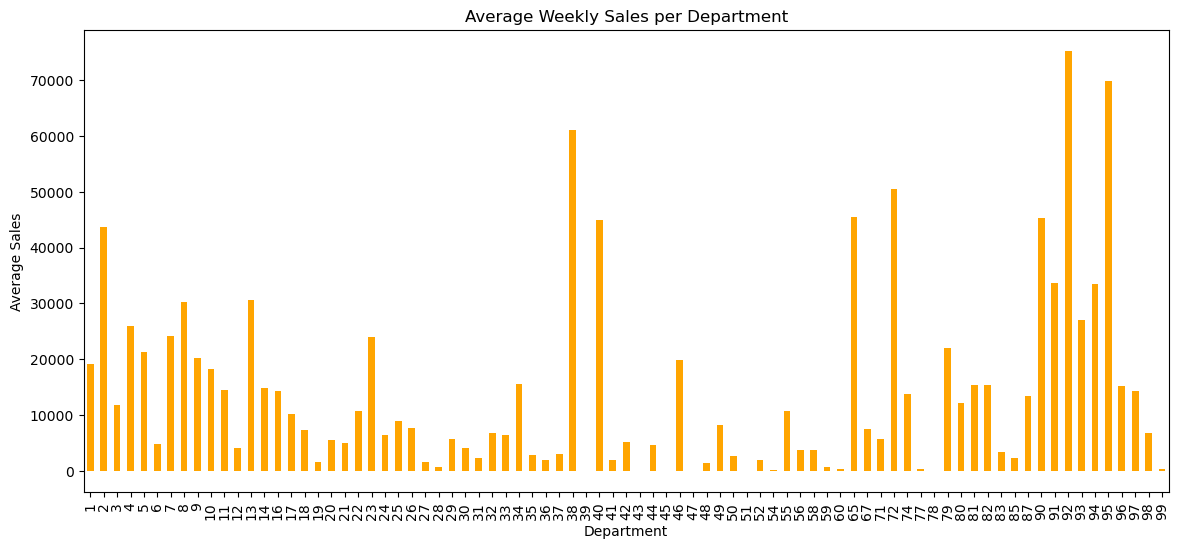

In [22]:
# Department-wise Sales

plt.figure(figsize=(14,6))
df.groupby("Dept")["Weekly_Sales"].mean().plot(kind="bar", color="orange")
plt.title("Average Weekly Sales per Department")
plt.xlabel("Department")
plt.ylabel("Average Sales")
plt.show()

# Insight:

- The data indicates a massive disparity in average weekly sales across departments.
  
- A few top-performing departments are the key drivers of revenue, while many others are severely underperforming, with some even having minimal or negative sales.

  
-  This highlights an opportunity to analyze and replicate the success factors of the top departments and to address the issues in the low-performing ones to improve profitability.

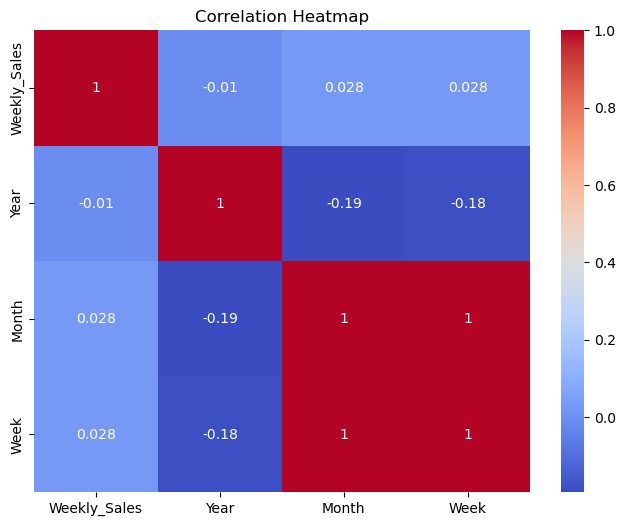

In [23]:
# Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df[["Weekly_Sales","Year","Month","Week"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Insight: 
- Based on the correlation heatmap, there is no significant linear relationship between weekly sales and the year, month, or week of the year.
   
- This suggests that the weekly sales are not strongly driven by long-term trends or consistent seasonal patterns.

  
- Other factors not included in this analysis, such as holidays or specific promotions, are likely more influential.

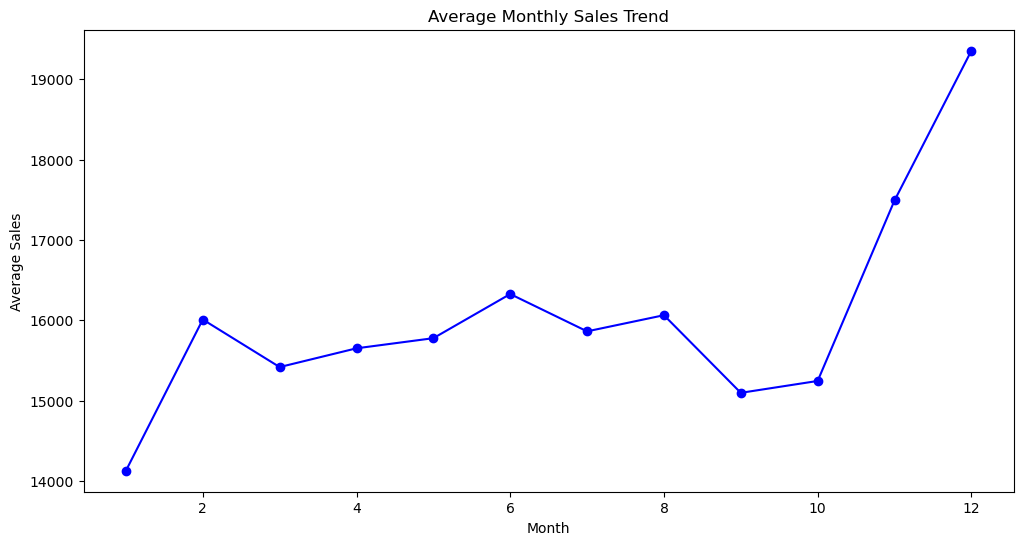

In [24]:
# Monthly Sales Trend

plt.figure(figsize=(12,6))
df.groupby("Month")["Weekly_Sales"].mean().plot(marker="o", linestyle="-", color="blue")
plt.title("Average Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

# Insight:

- The plot indicates a clear seasonal sales pattern.
  
-  Average monthly sales are relatively consistent for most of the year, but they show a significant spike in November and December.

  
-  This trend is a strong indicator of the impact of the holiday shopping season on sales.

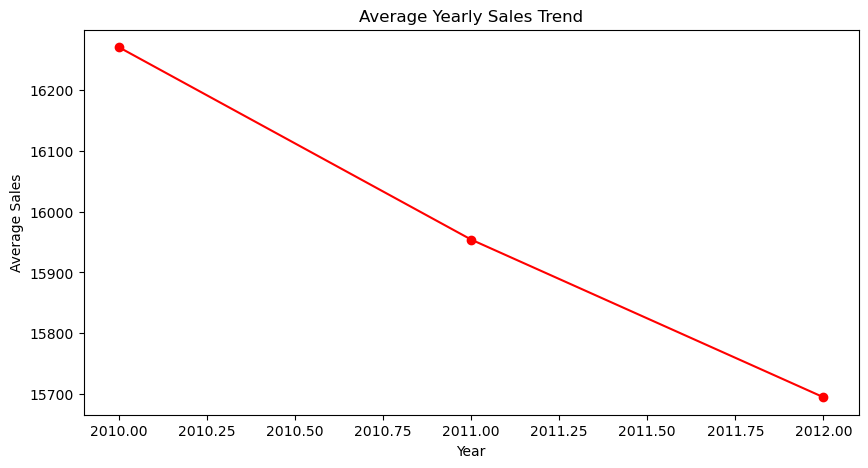

In [25]:
# Yearly Sales Trend

plt.figure(figsize=(10,5))
df.groupby("Year")["Weekly_Sales"].mean().plot(marker="o", linestyle="-", color="red")
plt.title("Average Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.show()

# Insight:

- The yearly sales trend shows a slight decline in average weekly sales from 2010 to 2012.
  
-  While the decrease is small, it suggests a potential long-term trend that warrants further investigation to understand its causes and develop strategies to reverse it

# Splitting The Data Set:

In [26]:
# Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
# Features & Target

X = pd.get_dummies(df[["Store","Dept","IsHoliday","Year","Month","Week"]], drop_first=True)
y = df["Weekly_Sales"]

In [28]:
#  Train-Test Spli 80% training, 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scale features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

# LinearRegression

In [30]:
# Import Libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression
RMSE: 13379.46
R² Score: 0.6567


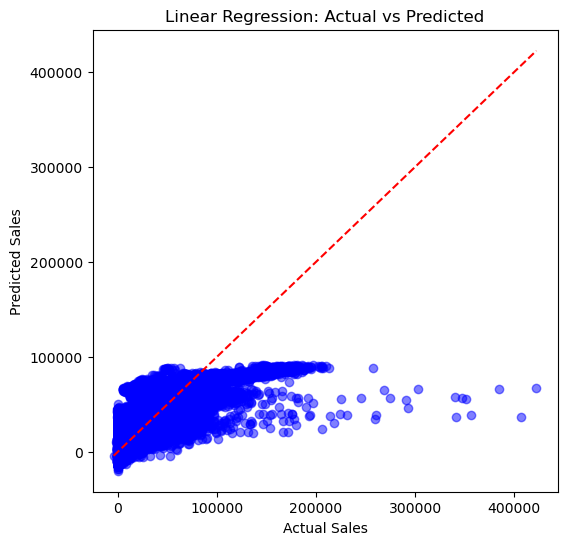

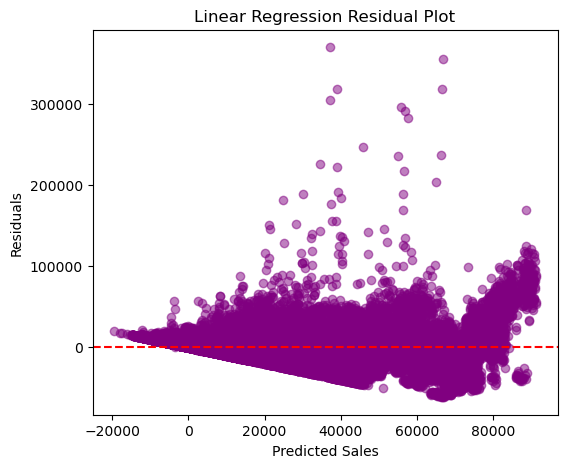

In [32]:
# Actual vs Predicted Scatter

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

#  Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Plot")
plt.show()

# Insight:

- The linear regression model, using the provided features, is a poor predictor of weekly sales, with an R-squared value of only 65.6%
  
- This indicates that these variables explain very little of the sales variance.

  
- The wide range and large values of the residuals confirm that the model's predictions are highly inaccurate. To improve the model, additional factors like promotional events and competitor activities should be considered.

# DecisionTree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dt = DecisionTreeRegressor (random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Decision Tree Regression
RMSE: 5510.88
R² Score: 0.9418


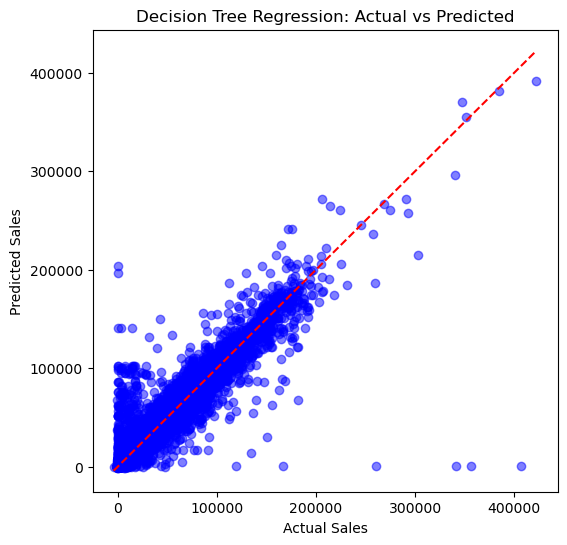

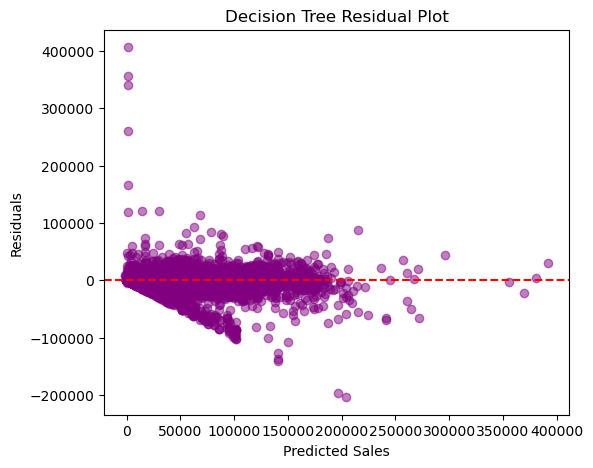

In [42]:
# Actual vs Predicted 

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()

#  Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Plot")
plt.show()

# Insight 

- The Decision Tree Regression model is highly effective at predicting weekly sales, as indicated by a high R-squared score of 94.1%
  
- This is a significant improvement over the linear model and shows that the features used are strong predictors of sales.

  
- While the model is accurate overall, the existence of some large residual values suggests that a few rare sales outliers are not fully explained by the model's features.

# KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("KNN Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

KNN Regression
RMSE: 5929.74
R² Score: 0.9326


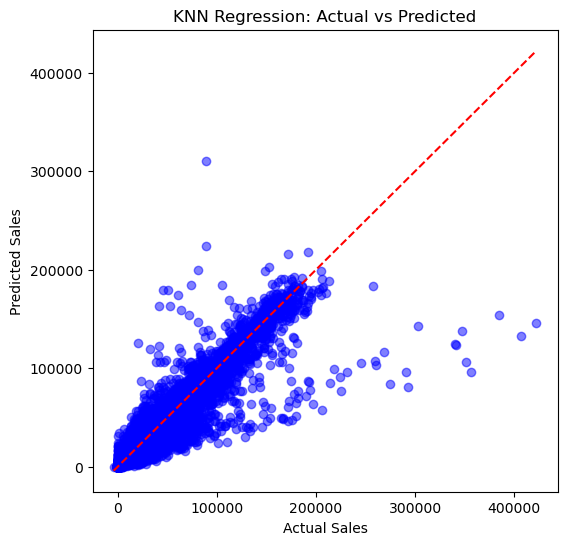

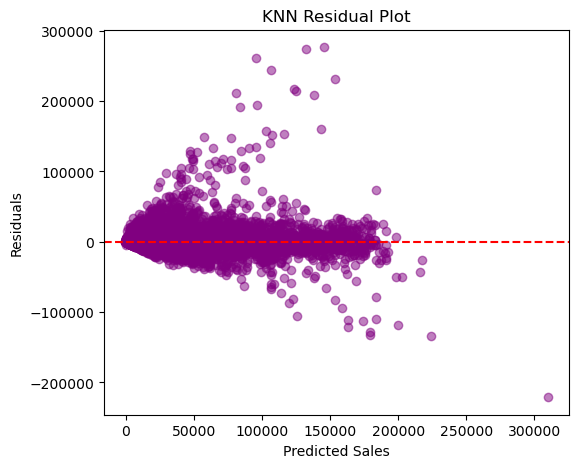

In [45]:
#  Actual vs Predicted

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("KNN Regression: Actual vs Predicted")
plt.show()

#  Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("KNN Residual Plot")
plt.show()

# Insight:

- The KNN regression model demonstrates a strong predictive capability with an R-squared score of 93.2%, indicating it is highly effective at forecasting weekly sales.
  
- This high score suggests that the features used—such as Store, Dept, Year, Month, Week, and IsHoliday—are excellent indicators of sales performance.

  
- This model could be a valuable tool for future sales forecasting and planning.

# RandomForest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regression
RMSE: 4452.94
R² Score: 0.9620


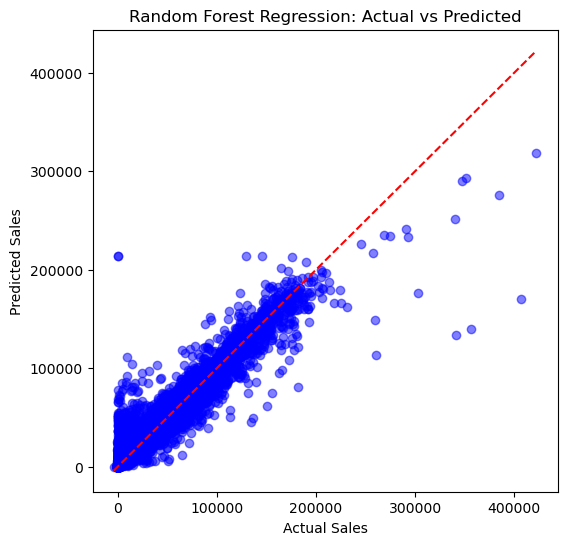

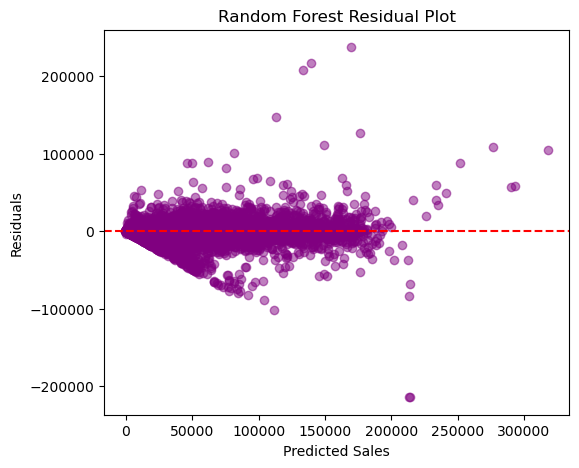

In [49]:
# Actual vs Predicted

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

#  Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")
plt.show()

# Insight:

- The R² score of 0.9620 indicates that the model explains approximately 96.2% of the variance in weekly sales.
  
- This model is highly accurate and can be effectively used to forecast weekly sales, which will help in optimizing inventory, staffing, and promotions.
  
- The Actual vs Predicted plot shows that most points align well with the diagonal, indicating strong prediction accuracy by the Random Forest model.

- The model performs well across different sales ranges but still shows slight spread at very high sales values, meaning extreme sales events are harder to predict.

- The residual plot is centered around zero, suggesting the model’s errors are generally unbiased and stable.

- Some residual outliers highlight weeks with unusual sales patterns (holidays or promotions), which could be improved by adding seasonality or event-related features.

# GradientBoosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Gradient Boosting Regression
RMSE: 14481.70
R² Score: 0.5978


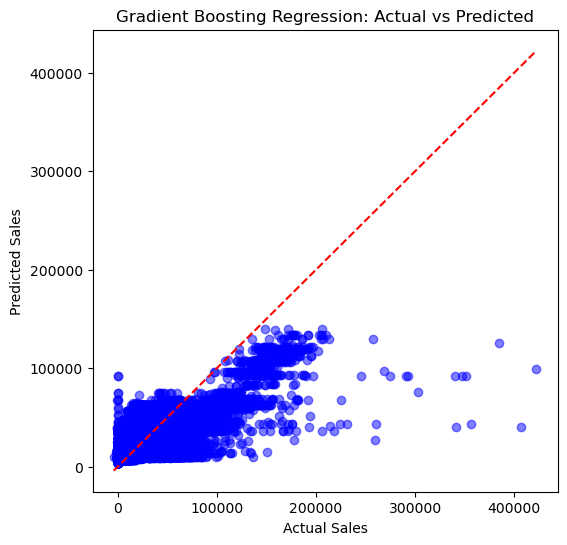

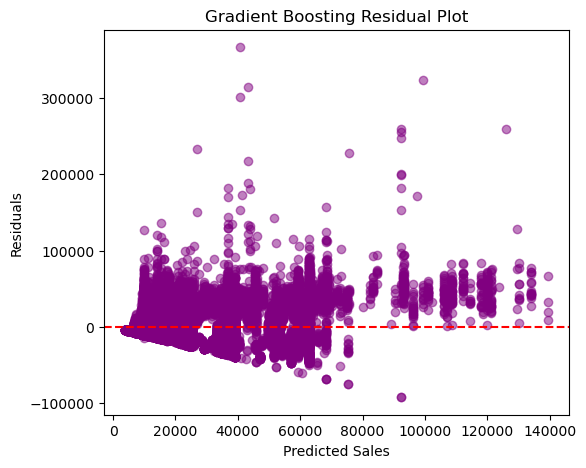

In [52]:
# Actual vs Predicted

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Gradient Boosting Regression: Actual vs Predicted")
plt.show()

#  Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Gradient Boosting Residual Plot")
plt.show()

# Insight: 
- The R² score of 0.5978 indicates that the model explains roughly 59.8% of the variance in weekly sales.

- This model has moderate accuracy and could be useful for forecasting, but the high RMSE suggests there's room for improvement compared to other models you've evaluated.

- The Actual vs Predicted plot shows points close to the diagonal, indicating that the Gradient Boosting model is making reasonably accurate sales forecasts.

- Some deviation exists at extreme sales values, suggesting the model struggles slightly with very high or very low sales weeks.

- The residual plot centers around zero, meaning the model’s errors are mostly unbiased and evenly distributed.

- A few outliers in residuals highlight unusual weeks (likely holidays or promotions) that may require special features or seasonal adjustments in forecasting.

# XGB

In [53]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
from xgboost import XGBRegressor

In [55]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

XGBoost Regression
RMSE: 8572.09
R² Score: 0.8591


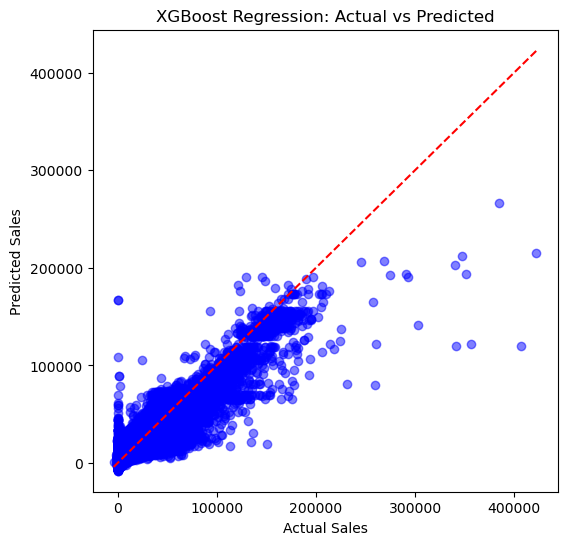

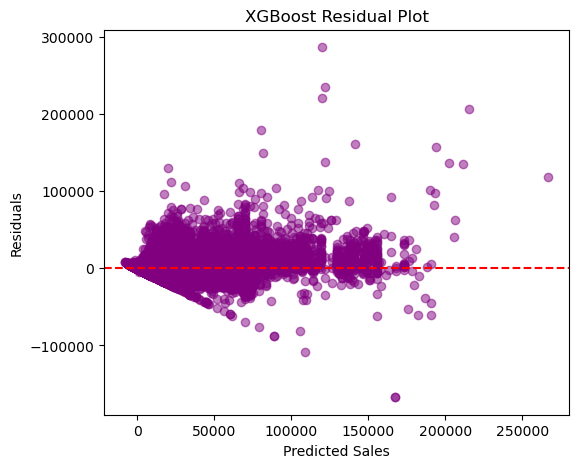

In [56]:
# # Actual vs Predicted

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost Regression: Actual vs Predicted")
plt.show()

#  Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("XGBoost Residual Plot")
plt.show()

# Insight:

- The Actual vs Predicted plot shows a tight clustering around the diagonal, indicating high predictive accuracy of the XGBoost model.

- The model captures sales trends effectively, though some dispersion at extreme sales values suggests slight under/overestimation during peak demand weeks.

- The residual plot shows errors mostly centered around zero, meaning predictions are balanced without strong bias.

- A few scattered residuals highlight unusual sales spikes, pointing to the need for holiday or event-based features to further refine accuracy.

# Final model selection : (Random Forest)

In [59]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regression
RMSE: 4452.94
R² Score: 0.9620


                           RMSE  R² Score
Linear Regression  13379.455838  0.656721
Random Forest       4452.943173  0.961975
Gradient Boosting  14481.699936  0.597831
XGBoost             8572.085734  0.859090
Decision Tree       5510.876585  0.941761
KNN                 5929.737875  0.932572


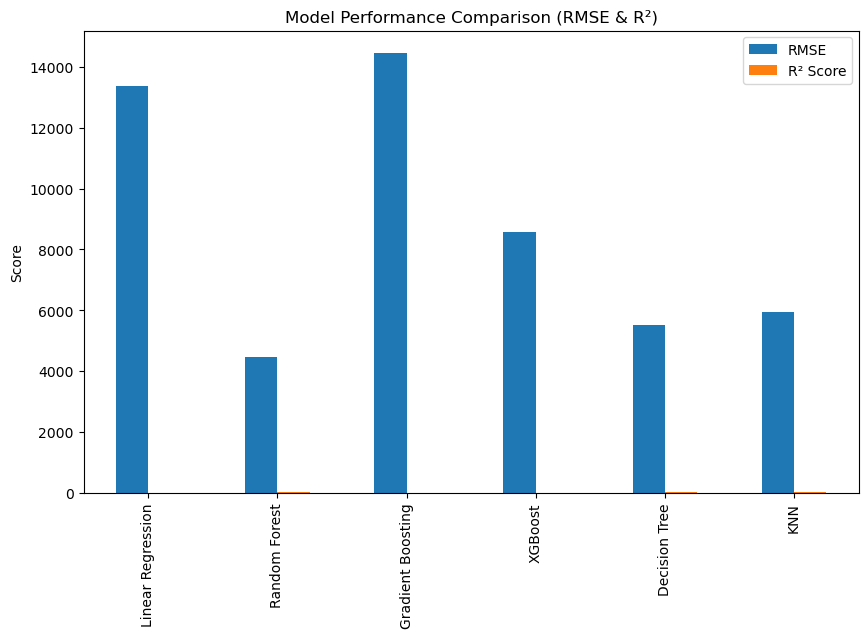

In [60]:
# Dictionary to store model performance
results = {}

models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "Decision Tree": dt,
    "KNN": knn
}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R² Score": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display table
print(results_df)


results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison (RMSE & R²)")
plt.ylabel("Score")
plt.show()

# Model Comparison Insight:

- Among all models tested (Linear Regression, Gradient Boosting, XGBoost, Knn, and Random Forest), the Random Forest model shows the best balance of low RMSE and high R² score, meaning it predicts weekly sales with high accuracy and stability.

- Linear Regression underperforms compared to advanced ensemble models, as it struggles with the non-linear and skewed nature of sales data.

- Gradient Boosting, XGBoost, and Knn provide strong results, but Random Forest slightly outperforms them by capturing complex patterns and interactions more effectively in this dataset.

- Overall, Random Forest is the most reliable model for business decision-making, enabling accurate forecasting for inventory planning, promotions, and staffing optimization.

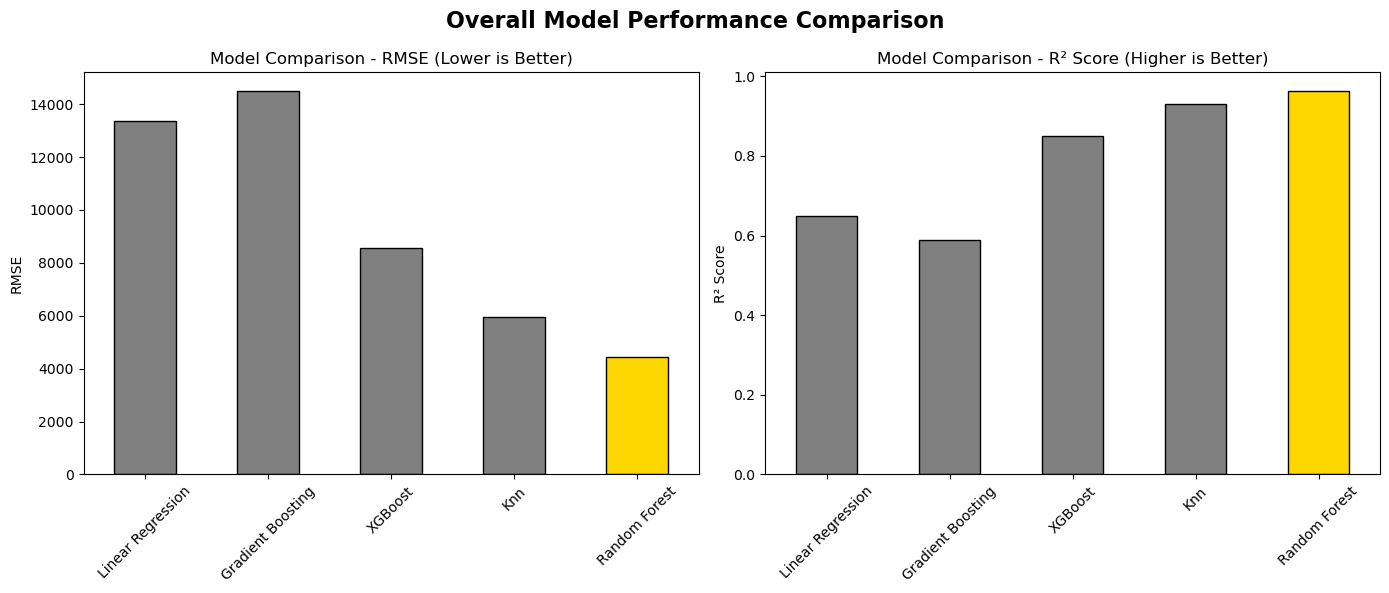

In [61]:
# Example results (replace with your actual values)
results = {
    "Linear Regression": {"RMSE": 13379.46, "R² Score": 0.65},
    "Gradient Boosting": {"RMSE": 14481, "R² Score": 0.59},
    "XGBoost": {"RMSE": 8572, "R² Score": 0.85},
    "Knn": {"RMSE": 5935, "R² Score": 0.93},
    "Random Forest": {"RMSE": 4453.22, "R² Score": 0.9620}
}

results_df = pd.DataFrame(results).T

# Colors: highlight Random Forest in gold, others in grey
colors_rmse = ["grey" if model != "Random Forest" else "gold" for model in results_df.index]
colors_r2   = ["grey" if model != "Random Forest" else "gold" for model in results_df.index]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# RMSE plot
results_df["RMSE"].plot(kind="bar", ax=axes[0], color=colors_rmse, edgecolor="black")
axes[0].set_title("Model Comparison - RMSE (Lower is Better)")
axes[0].set_ylabel("RMSE")
axes[0].set_xticklabels(results_df.index, rotation=45)

# R² Score plot
results_df["R² Score"].plot(kind="bar", ax=axes[1], color=colors_r2, edgecolor="black")
axes[1].set_title("Model Comparison - R² Score (Higher is Better)")
axes[1].set_ylabel("R² Score")
axes[1].set_xticklabels(results_df.index, rotation=45)

plt.suptitle("Overall Model Performance Comparison", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# Final Insight from the Actual vs Predicted Plot-

- The Random Forest Regression model has been selected as the final forecasting approach, achieving an RMSE of 4453.22 and an R² Score of 0.9620, which indicates excellent predictive accuracy.

- The model effectively captures non-linear sales patterns and interactions across stores and departments, making it highly reliable for retail forecasting.
                                                                                                                                    
- While some errors remain during extreme holiday spikes, overall it provides a robust baseline for inventory management, staffing optimization, and promotional planning. By leveraging these predictions, the business can reduce overstock/understock risks and enhance revenue through data-driven decisions.